In [2]:
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import networkx as nx
import magine.ontology.enrichment_tools as et
import magine.networks.visualization.notebook_tools as nt
import magine.networks.visualization.notebooks.view as view
from magine.networks.network_subgraphs import NetworkSubgraphs
from exp_data import exp_data
from magine.networks.visualization.igraph_tools import paint_network_overtime
from magine.plotting.heatmaps import heatmap_by_terms

# Exploring network using enrichment analysis

### This example uses the enrichment output we just obtained to explore the network.

First, lets load the molecular network and the enrichment output from the previous runs. 

In [3]:
enrichment_array = pd.read_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)
network = nx.read_gpickle('Data/cisplatin_based_network.p')
subgraph_gen = NetworkSubgraphs(network=network, exp_data=exp_data)

For this example, we will only look at the proteomics data. 

In [4]:
proteomics = et.filter_rows(enrichment_array, column='category', options=['proteomics_up'])
proteomics = proteomics[~proteomics['term_name'].isnull()]

In [5]:
print_cols = ['term_name', 'combined_score', 'adj_p_value', 'n_genes', 'rank']

In [6]:
display(proteomics.head(10))
display(proteomics[print_cols].head(10))

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db
188172,Cell cycle_hsa,1,14.413087,0.050632,"CDC16,CDC20,CDC7,HDAC1,MYC,PLK1,RBL1,SMC1A,YWHAZ",9,01hr,proteomics_up,KEGG_2016
188173,Ubiquitin mediated proteolysis_hsa,2,12.287342,0.052898,"BRCA1,CDC16,CDC20,CUL3,CUL4A,CUL4B,HUWE1,PIAS1...",9,01hr,proteomics_up,KEGG_2016
188174,Fanconi anemia pathway_hsa,3,10.710765,0.131164,"BRCA1,ERCC4,SLX4,TELO2,USP1",5,01hr,proteomics_up,KEGG_2016
188175,Colorectal cancer_hsa,4,10.518335,0.180117,"APC,APPL1,BRAF,MAPK3,MYC",5,01hr,proteomics_up,KEGG_2016
188176,Longevity regulating pathway - multiple specie...,5,10.147214,0.180117,"EIF4EBP2,HDAC1,HSPA2,INSR,IRS2",5,01hr,proteomics_up,KEGG_2016
188177,Chronic myeloid leukemia_hsa,6,8.498568,0.202521,"BRAF,HDAC1,MAPK3,MYC,SHC1",5,01hr,proteomics_up,KEGG_2016
188178,Spliceosome_hsa,7,8.196754,0.202521,"DDX5,HNRNPA1,HNRNPM,HSPA2,PRPF3,SRSF9,THOC2",7,01hr,proteomics_up,KEGG_2016
188179,Nucleotide excision repair_hsa,8,7.578202,0.202521,"CUL4A,CUL4B,ERCC4,ERCC5",4,01hr,proteomics_up,KEGG_2016
188180,Endometrial cancer_hsa,9,7.475636,0.253848,"APC,BRAF,MAPK3,MYC",4,01hr,proteomics_up,KEGG_2016
188181,Oocyte meiosis_hsa,10,6.439651,0.296947,"CDC16,CDC20,MAPK3,PLK1,SMC1A,YWHAZ",6,01hr,proteomics_up,KEGG_2016


,term_name,combined_score,adj_p_value,n_genes,rank
188172,Cell cycle_hsa,14.413087,0.050632,9,1
188173,Ubiquitin mediated proteolysis_hsa,12.287342,0.052898,9,2
188174,Fanconi anemia pathway_hsa,10.710765,0.131164,5,3
188175,Colorectal cancer_hsa,10.518335,0.180117,5,4
188176,Longevity regulating pathway - multiple specie...,10.147214,0.180117,5,5
188177,Chronic myeloid leukemia_hsa,8.498568,0.202521,5,6
188178,Spliceosome_hsa,8.196754,0.202521,7,7
188179,Nucleotide excision repair_hsa,7.578202,0.202521,4,8
188180,Endometrial cancer_hsa,7.475636,0.253848,4,9
188181,Oocyte meiosis_hsa,6.439651,0.296947,6,10


For this example, we just want to look at "biological processes" descriptions, so we will limit our analysis to only databases with this type of information

In [7]:
print(proteomics['db'].unique())

['KEGG_2016' 'NCI-Nature_2016' 'Panther_2016' 'WikiPathways_2016'
 'BioCarta_2016' 'Humancyc_2016' 'Reactome_2016' 'KEA_2015'
 'GO_Biological_Process_2017' 'GO_Molecular_Function_2017'
 'GO_Cellular_Component_2017' 'ChEA_2016' 'TRANSFAC_and_JASPAR_PWMs'
 'ENCODE_TF_ChIP-seq_2015' 'Kinase_Perturbations_from_GEO_down'
 'Kinase_Perturbations_from_GEO_up'
 'LINCS_L1000_Kinase_Perturbations_down'
 'LINCS_L1000_Kinase_Perturbations_up'
 'Ligand_Perturbations_from_GEO_down' 'Ligand_Perturbations_from_GEO_up'
 'DrugMatrix' 'Drug_Perturbations_from_GEO_2014']


In [8]:
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'BioCarta_2016',
        'Humancyc_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]

In [ ]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       db=process_dbs,
                                      )
display(time_1_hour_prot[print_cols].head(15))

In [9]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       sample_id='01hr', 
                                       db=process_dbs,
                                      )
display(time_1_hour_prot[print_cols].head(15))

,term_name,combined_score,adj_p_value,n_genes,rank
189887,"negative regulation of transcription, DNA-temp...",68.261978,0.001601,22,1
189000,Cell Cycle_hsa,36.507320,0.000267,28,1
189001,Interleukin-2 signaling_hsa,30.220851,0.001586,16,2
189889,resolution of meiotic recombination intermediates,29.557281,0.016485,4,3
189002,"Interleukin-3, 5 and GM-CSF signaling_hsa",29.303950,0.001586,16,3
189003,"Cell Cycle, Mitotic_hsa",27.727089,0.001586,22,4
189004,Interleukin receptor SHC signaling_hsa,27.242088,0.001586,15,5
189005,MAPK family signaling cascades_hsa,26.440058,0.001586,16,6
189006,Signaling by FGFR2_hsa,25.922377,0.001586,18,7
189007,Insulin receptor signalling cascade_hsa,25.791980,0.001586,16,8


Since terms across databases might be redundant ("Interleukin-3, 5 and GM-CSF signaling_Homo sapiens_R-HSA-512988" and "Interleukin receptor SHC signaling_Homo sapiens_R-HSA-912526" have nearly a full overlap of genes), we want to eliminate duplicate terms and focus on the most enriched. 

For that we use the Jaccard Index. It is impelmented in the find_similar_terms function in enrichment_tools (et).

In [10]:
filtered_1hr = et.filter_similar_terms(time_1_hour_prot, threshold=.7)
display(filtered_1hr[print_cols].head(20))

Number of rows went from 89 to 26


,term_name,combined_score,adj_p_value,n_genes,rank
189887,"negative regulation of transcription, DNA-temp...",68.261978,0.001601,22,1
189000,Cell Cycle_hsa,36.507320,0.000267,28,1
189001,Interleukin-2 signaling_hsa,30.220851,0.001586,16,2
189889,resolution of meiotic recombination intermediates,29.557281,0.016485,4,3
189006,Signaling by FGFR2_hsa,25.922377,0.001586,18,7
189008,Signalling by NGF_hsa,25.783068,0.001586,21,9
189893,mitotic cytokinesis,24.798241,0.030953,5,7
188581,XPodNet - protein-protein interactions in the ...,22.460249,0.011088,30,1
189894,chloride transport,22.310453,0.029255,5,8
189032,Axon guidance_hsa,20.509597,0.001586,22,33


Now we can explore the top hits, which has been slimmed from 89 to 33 terms. Generally this is where the expert knowledge comes in. However, a quick search with each term and search terms of you molecule of interest tend to be useful. 

The first hit is 'negative regulation of transcription', which means that something caused genes not to be transcribed. Cisplatin causes DNA damage, thus negative regulaton of transcription makes sense. So does top hit 2, 'Cell Cycle_Homo sapiens_hsa'. 

A quick search for 'Interleukin-2 signaling' and 'Cisplatin' __[link](https://www.google.com/search?rlz=1C1CHBD_enUS721US721&ei=KzNeWuCxBsfq_AaSgYuYDQ&q=Interleukin-2+signaling+cisplatin&oq=Interleukin-2+signaling+cisplatin&gs_l=psy-ab.3..35i39k1.8097.9052.0.9196.10.10.0.0.0.0.145.897.7j3.10.0....0...1c.1.64.psy-ab..3.2.218....0.TInUjcZY740)__ returns a paper titled "Cisplatin at clinically relevant concentrations enhances interleukin-2 synthesis by human primary blood lymphocytes." __[link](https://www.ncbi.nlm.nih.gov/pubmed/10211553)__


We can link the two together to see how once might regulate the other by looking at the molecular interactions.

## Expected findings

In [11]:
shorten_names = {
    'Cell Cycle_hsa':'Cell Cycle',
    'DNA Repair_hsa' : 'DNA Repair',
                }
rename_all = proteomics.copy()
rename_all['term_name'] = rename_all['term_name'].replace(shorten_names)
dna_and_cellcycle_term, dna_and_cellcycle_mole = nt.create_subnetwork(['Cell Cycle', 'DNA Repair'], 
                                                                      rename_all, 
                                                                      network, 
                                                                      'entire_network')

('Cell Cycle', 109)
('DNA Repair', 38)
Looking for direct edges


In [12]:
view.render_graph(dna_and_cellcycle_mole, add_parent=True)

In [13]:
view.render_graph(dna_and_cellcycle_term)

In [ ]:
rename_all['term_name'] = rename_all['term_name'].replace(shorten_names)
['Cell Cycle', 'DNA Repair']

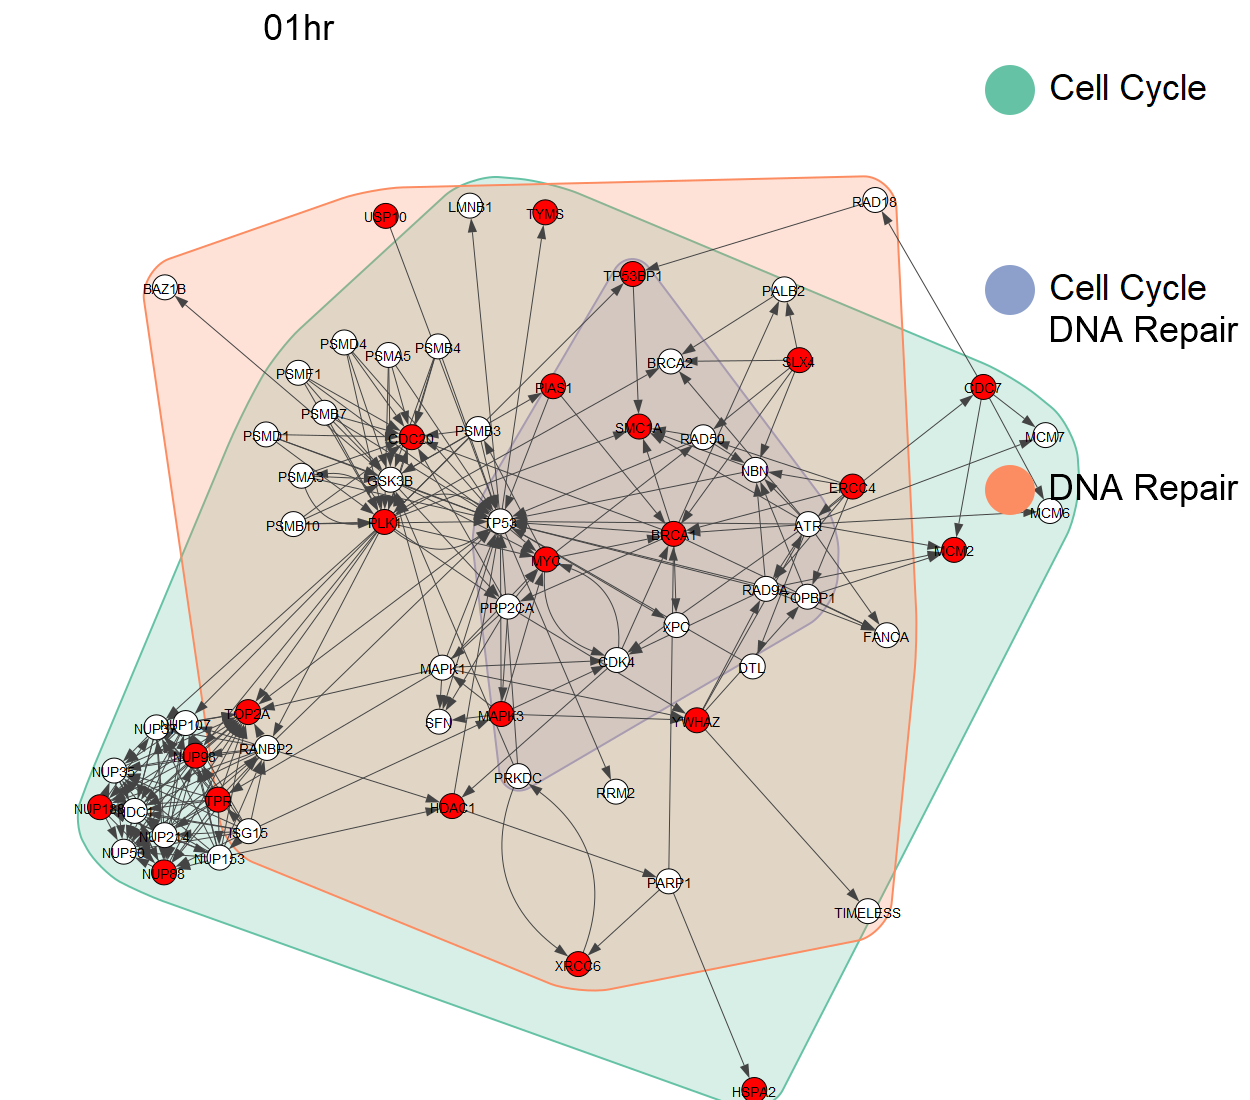

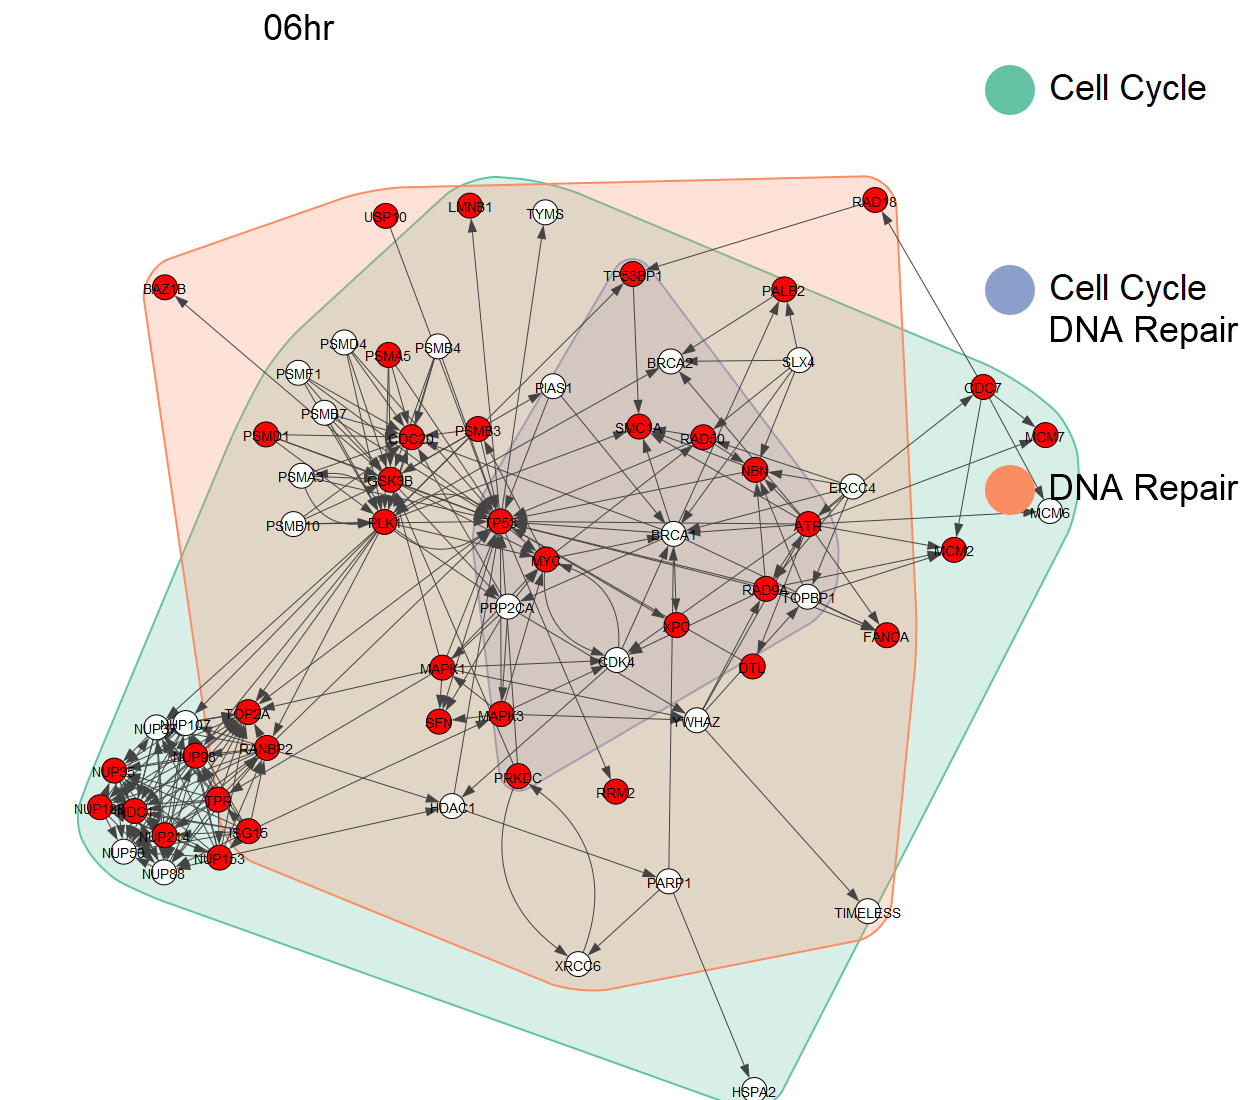

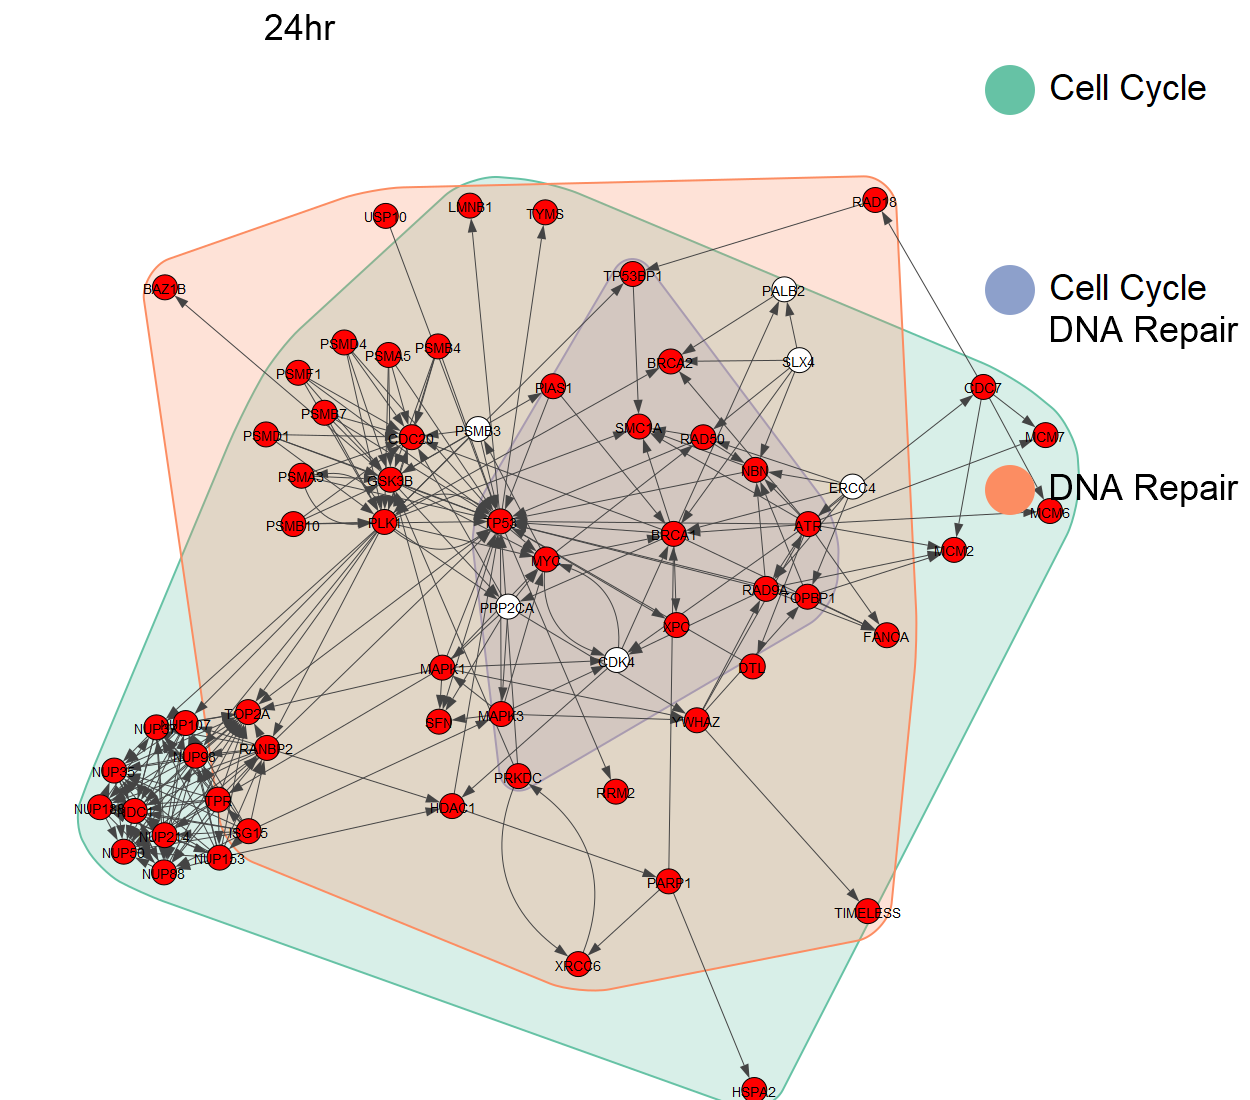

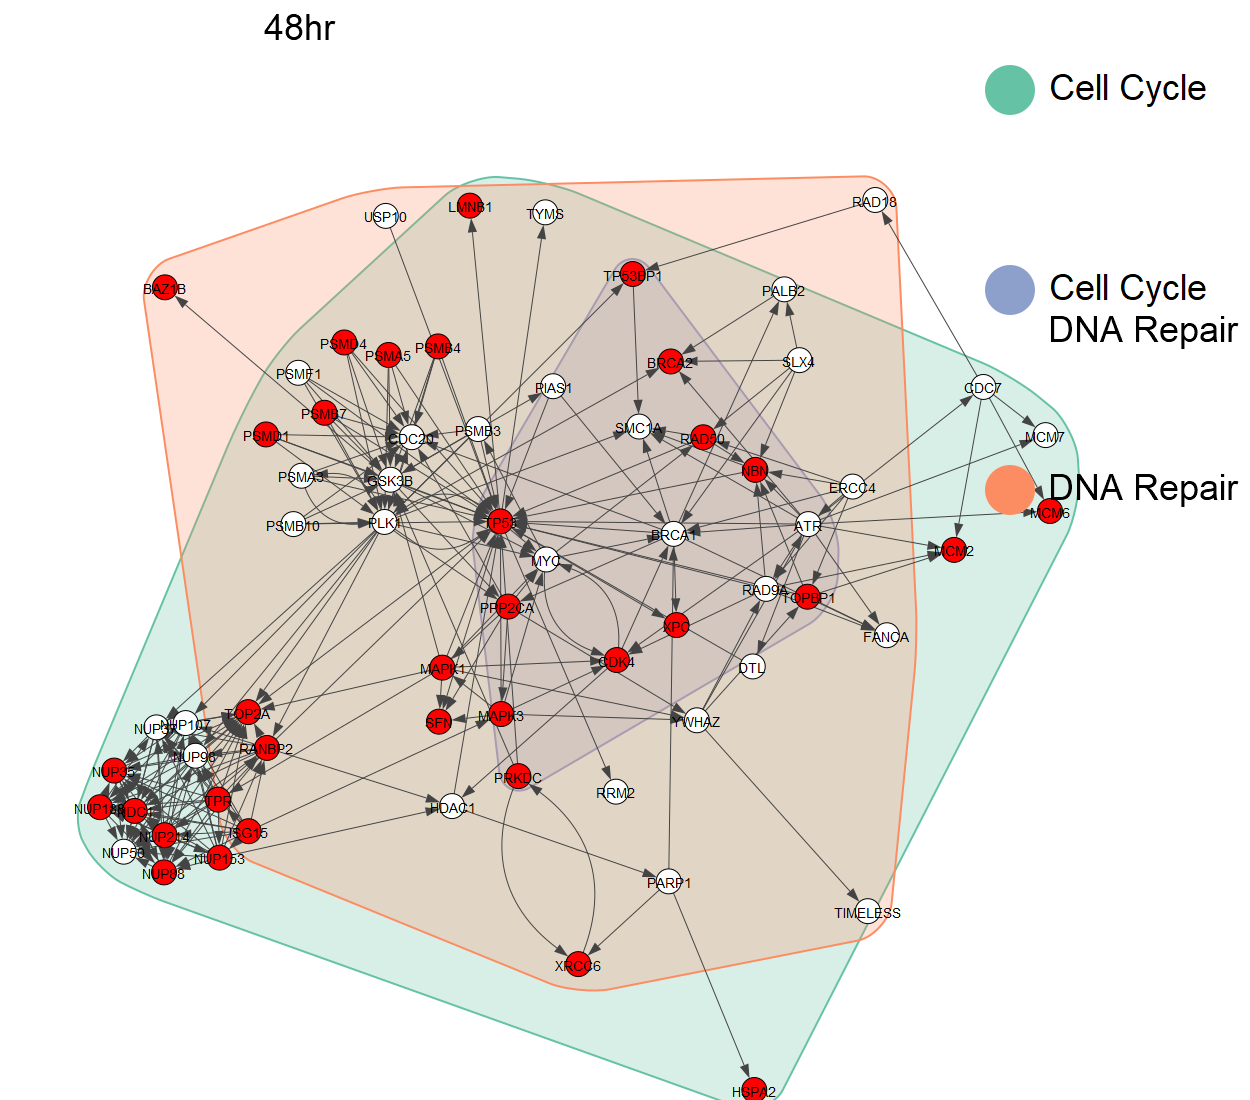

In [13]:
paint_network_overtime(dna_and_cellcycle_mole, exp_data, 'red', 'dna_cell_cycle' )

In [14]:
view.display_graph(dna_and_cellcycle_term)

In [28]:
view.display_graph(dna_and_cellcycle_mole, add_parent=True)

In [34]:
# dna_genes = et.term_to_genes(df=proteomics, term='DNA Repair_Homo sapiens_R-HSA-73894')
dna_genes = et.term_to_genes(df=time_1_hour_prot, term='DNA Repair_hsa')
print(len(dna_genes))

12


In [40]:
dna_network = subgraph_gen.shortest_paths_between_lists(
    dna_genes, max_length=3
)
print(len(dna_network.nodes()))

Removing from list
13


In [41]:
print(len(dna_network.nodes()))

13


In [42]:
view.render_graph(dna_network)

In [43]:

plus_neighbors = subgraph_gen.expand_neighbors(dna_network, down_stream=True, 
                                               expand_all=True,
                                               include_list=exp_data.sig_species_over_time['06hr'])

Removing from list


In [45]:
print(len(plus_neighbors.nodes()))
print(len(plus_neighbors.edges()))

275
339


In [46]:
view.render_graph(plus_neighbors)

In [ ]:
# view.render_graph(plus_neighbors)
paint_network_overtime(plus_neighbors, exp_data, ['red', 'green', 'lightblue', 'purple'], 'dna' )

In [ ]:
# subgraph_gen.measured_networks_over_time(plus_neighbors, ['red', 'green', 'lightblue', 'purple'], 'dna')

In [ ]:
subgraph_gen.measured_networks_over_time(dna_network, ['red', 'green', 'lightblue', 'purple'], 'dna')

In [ ]:
from magine.plotting.species_plotting import plot_list_of_genes
plot_list_of_genes(exp_data.data, dna_genes, save_name='dna_genes', image_format='png', plot_type='matplotlib')

In [ ]:
time_1_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05,
                                       combined_score=0.0, 
                                       sample_id='01hr', 
                                       db=process_dbs,
                                      )
kinases = et.filter_dataframe(proteomics, 
                              p_value=0.05, 
                              sample_id='01hr', 
                              combined_score=0.0, 
                              db='KEA_2015')
kinases = et.remove_redundant(kinases)

display(kinases[print_cols].head(20))

## Exploring other top hits from 1 hour

### Side effects of cisplatin
Chemotherapy-induced peripheral neuropathy. __[link](https://www.frontiersin.org/articles/10.3389/fnins.2017.00481/full)__
It is not well understood why cisplatin causes CIPN. Surprisely here, we see that Axon Guidance has a combined score of 20.5. 33 species are effected by cisplain that are linked with axon guidance. We are not neural experts and did not know that axon guidance was related to CIPN. Using MAGINE we were able to find ties between the two.

In [ ]:
axon_guidance = et.term_to_genes(df=renamed_1hr, term='Axon guidance_Homo sapiens_R-HSA-422475')
print(axon_guidance)

In [ ]:
g = subgraph_gen.neighbors_of_list(axon_guidance, up_stream=True, down_stream=False, max_dist=1, 
                                   include_only=exp_data.sig_species_over_time['01hr']
                                  )
nt.render_graph(g)

In [27]:
print(chloride_transport)

set(['CLIC4', 'ANO4', 'ANO5', 'ANO6', 'SLC26A8'])


In [26]:
chloride_transport = et.term_to_genes(df=renamed_1hr, term='chloride transport')
print(chloride_transport)
chl_trans = subgraph_gen.neighbors_of_list(chloride_transport, max_dist=2, 
#                                            include_only=exp_data.list_species
                                          )
nt.display_graph(chl_trans)

set(['CLIC4', 'ANO4', 'ANO5', 'ANO6', 'SLC26A8'])


# 6 hour time point

In [ ]:
time_6_hour_prot = et.filter_dataframe(proteomics, 
                                       p_value=0.05, 
                                       combined_score=0.0, 
                                       sample_id='06hr', 
                                       db=process_dbs
                                      )
slimmed = et.filter_similar_terms(time_6_hour_prot, threshold=.7)
display(slimmed[print_cols].head(25))

In [ ]:
shorten_names = {
    'protein sumoylation':'protein sumoylation',
    'Activation of the AP-1 family of transcription factors_Homo sapiens_R-HSA-450341' : 'AP1 activation',
    'response to cAMP' : 'response to cAMP',
                }
time_6_hour_prot['term_name'] = time_6_hour_prot['term_name'].replace(shorten_names)
term_net_6, mol_net_6 = nt.create_subnetwork(shorten_names.values(),
                                             time_6_hour_prot, 
                                             network,
                                             '06hr')


In [ ]:
view.display_graph(term_net_6)

In [ ]:
view.render_graph(mol_net_6)

In [ ]:
time_24_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, 
                                        category='proteomics_up', 
                                        sample_id='24hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_24_hour_prot, threshold=.5)
display(slimmed[print_cols].head(25))

In [ ]:
shorten_names = {
                 'cellular response to DNA damage stimulus': 'DDR',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'Apoptosis_Homo sapiens_R-HSA-109581' : 'Apoptosis',
                }
renamed = time_24_hour_prot.copy()
time_24_hour_prot['term_name'] = time_24_hour_prot['term_name'].replace(shorten_names)
term_net_24, mol_net_24 = nt.create_subnetwork(shorten_names.values(), time_24_hour_prot, network, '24hr', cytoscape_js=False)

In [ ]:
view.display_graph(term_net_24)

In [ ]:
view.display_graph(mol_net_24, add_parent=True )

In [ ]:
time_48_hour_prot = et.filter_dataframe(proteomics, p_value=0.05, combined_score=0.0, category='proteomics_up', 
                                        sample_id='48hr', db=process_dbs)
slimmed = et.filter_similar_terms(time_48_hour_prot, threshold=.5)
display(slimmed[print_cols].head(25))

In [ ]:
shorten_names = {
                 'membrane organization': 'Membrane Organization',
                 'negative regulation of apoptotic process': 'negative regulation of apoptosis',
                 'neutrophil degranulation' : 'neutrophil degranulation',
                }
time_48_hour_prot['term_name'] = time_48_hour_prot['term_name'].replace(shorten_names)
term_net_48, mol_net_48 = nt.create_subnetwork(shorten_names.values(), time_48_hour_prot, network, '48hr')

In [ ]:
view.display_graph(term_net_48)

In [ ]:
view.render_graph(mol_net_48, add_parent=True)